# TP1 - Pandas y Visualización de datos
## Pablo Prieto (91561)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline
from IPython.display import Image
from IPython.display import HTML
from collections import defaultdict
from IPython.display import Image

In [2]:
movies = pd.read_csv('data/movies.csv', low_memory=False)
movies.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"Adventure,Fantasy,Family",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"Romance,Comedy",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"Comedy,Drama,Romance",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"Action,Crime,Drama,Thriller",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"Comedy,Romance",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"Action,Adventure,Drama,Family",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"Action,Adventure,Thriller",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,James Bond Collection,58000000,"Adventure,Action,Thriller",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [3]:
crew = pd.read_csv('data/crew.csv', low_memory=False)
crew.head(10)

,id,crew_id,department,job,name
0,862,7879,Directing,Director,John Lasseter
1,862,12891,Writing,Screenplay,Joss Whedon
2,862,7,Writing,Screenplay,Andrew Stanton
3,862,12892,Writing,Screenplay,Joel Cohen
4,862,12893,Writing,Screenplay,Alec Sokolow
5,862,12894,Production,Producer,Bonnie Arnold
6,862,12895,Production,Executive Producer,Ed Catmull
7,862,12896,Production,Producer,Ralph Guggenheim
8,862,12897,Production,Executive Producer,Steve Jobs
9,862,8,Editing,Editor,Lee Unkrich


In [4]:
companies = pd.read_csv('data/companies.csv', low_memory=False)
companies.head(10)

,id,name
0,3,Pixar Animation Studios
1,559,TriStar Pictures
2,2550,Teitler Film
3,10201,Interscope Communications
4,6194,Warner Bros.
5,19464,Lancaster Gate
6,306,Twentieth Century Fox Film Corporation
7,5842,Sandollar Productions
8,9195,Touchstone Pictures
9,508,Regency Enterprises


In [4]:
ratings = pd.read_csv('data/ratings.csv', low_memory=False)
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [3]:
keywords = pd.read_csv('data/keywords.csv', low_memory=False)
keywords.head(10)

,id,keywords
0,862,"jealousy,toy,boy,friendship,friends,rivalry,bo..."
1,8844,"board game,disappearance,based on children's b..."
2,15602,"fishing,best friend,duringcreditsstinger,old men"
3,31357,"based on novel,interracial relationship,single..."
4,11862,"baby,midlife crisis,confidence,aging,daughter,..."
5,949,"robbery,detective,bank,obsession,chase,shootin..."
6,11860,"paris,brother brother relationship,chauffeur,l..."
7,45325,NaN
8,9091,"terrorist,hostage,explosive,vice president"
9,710,"cuba,falsely accused,secret identity,computer ..."


In [3]:
imdb_actors = pd.read_csv('data/imdb_actors.csv', low_memory=False)
imdb_actors.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0077711,tt0036855,tt0038109,tt0034583"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer","tt0042593,tt0043265,tt0034583,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0047296,tt0078788,tt0070849,tt0068646"
8,nm0000009,Richard Burton,1925,1984,"actor,soundtrack,producer","tt0057877,tt0087803,tt0059749,tt0061184"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0029870,tt0035575,tt0042041,tt0055256"


# PRIMERA PARTE - Pandas

# P7. ¿Cúal es el porcentaje de películas que contienen a su título en la descripción?

In [80]:
movies_title = movies.loc[(pd.notna(movies.overview) & pd.notna(movies.title)), ['title', 'overview']]

movies_title['title'] = movies_title['title'].apply(lambda x: x.lower())
movies_title['overview'] = movies_title['overview'].apply(lambda x: x.lower())

movies_title['contain'] = movies_title.apply(lambda x: x.title in x.overview, axis=1)

movies_title_in_description = movies_title.loc[movies_title.contain == True, :]

print(movies_title_in_description['contain'].count())
print(movies_title['contain'].count())
print((movies_title_in_description['contain'].count() / movies_title['contain'].count()) * 100)

7186
44506
16.146137599424797


Por lo tanto, el porcentaje de películas que contienen a su título en la descripción es de 16,15%

# P32. Al parecer hay personas que además de actuar en una película también trabajaron en ella desde algún otro rol. ¿Cuál de estas personas es la que más trabajos tuvo en una misma película? Indicar el nombre de la película, el nombre de la persona y la cantidad de trabajos que tuvo.

In [105]:
movies_actors = movies.loc[(pd.notna(movies.id) & movies.id.str.isnumeric()), ['id', 'title']]
movies_actors['id'] = movies_actors['id'].astype(int)
movies_actors = movies_actors.merge(crew, on='id', how='inner')
                      
movies_actors = movies_actors\
        .groupby(['id', 'crew_id']).agg({'title': 'first', 'name': 'first', 'job': 'count'})\
        .reset_index()\
        .rename(columns={"job": "job_count"})

movies_actors.nlargest(1, 'job_count')

,id,crew_id,title,name,job_count
322929,141971,108481,Blackout,JP Siili,18


Por lo tanto, la persona que más trabajos tuvo en una misma película es "JP Siili" en la película "Blackout" con una cantidad de 18 trabajos.

# P27. En todo el mundo el estado financia parcialmente al cine de las productoras locales. Una preocupación creciente es la existencia de ñoquis en las crew de las películas que son amigos o conocidos de la producción de las mismas a expensas de fondos del estado. La consultora “Espumadera” es una startup Argentina se dedica a encontrar posibles ñoquis para auditar en distintos contextos y tiene como clientes a organismos estatales de todo el mundo. Deseamos buscar anomalías para auditar en la crew de las películas, ¿Quienes superan el percentil 95 de producciones en las que participaron en roles distintos de directores, productores o escritores en el mismo año de estreno?

In [47]:
movies_anomalies = movies.loc[(pd.notna(movies.id) & movies.id.str.isnumeric()), ['id', 'release_date']]
movies_anomalies['id'] = movies_anomalies['id'].astype(int)
crew_department_prod = crew.loc[\
    ((crew.department == 'Directing') | (crew.department == 'Production') | (crew.department == 'Editing')),\
    ['id', 'crew_id', 'name', 'department']]

movies_anomalies = movies_anomalies.merge(crew_department_prod, on='id', how='inner')

movies_anomalies = movies_anomalies.merge(ratings, left_on=['id','crew_id'], right_on = ['movieId','userId'], how='inner')
movies_anomalies['timestamp'] = pd.to_datetime(movies_anomalies['timestamp'], unit='s').dt.strftime('%Y')
movies_anomalies = movies_anomalies.loc[(movies_anomalies['release_date'].str.split('-').str[0] == movies_anomalies['timestamp']), :]

movies_anomalies = movies_anomalies\
        .groupby(['id', 'crew_id']).agg({'name': 'first', 'department': 'count'})\
        .reset_index()\
        .rename(columns={"department": "prod_count"})


movies_anomalies

,id,crew_id,name,prod_count
0,300,201,Michel Gondry,2
1,440,6043,Dan Zimmerman,1
2,442,5982,Joachim Stridsberg,1
3,953,64443,Teresa Cheng,1


In [55]:
print(movies_anomalies['id'].count() * 0.95)

3.8


Por lo tanto, el percentil 95 de la cantidad de personas que participaron en roles distintos de directores, productores o escritores en el mismo año de estreno es de 1. Así que el 95% de todos los usuarios tienen hasta 1 producción distinta y sólo el 5% de usuarios tienen más de 1, siendo la persona "Michel Gondry" con 2 cantidades.

# C2. Sin contar el género “Foreign” considerando la probabilidad de hacer una película en cada género para cada productora con más de 100 películas, ¿Cuáles son las 5 productoras con más entropía de Shannon en base 2?

In [5]:
movies_not_foreign = movies.loc[~movies.genres.str.contains('Foreign', case=False, regex=False, na=True),\
                                ['id', 'genres', 'production_companies']]
movies_not_foreign

,id,genres,production_companies
0,862,"Animation,Comedy,Family",3
1,8844,"Adventure,Fantasy,Family","559,2550,10201"
2,15602,"Romance,Comedy","6194,19464"
3,31357,"Comedy,Drama,Romance",306
4,11862,Comedy,"5842,9195"
...,...,...,...
45459,222848,Science Fiction,4688
45460,30840,"Drama,Action,Romance","7025,10163,16323,38978"
45461,439050,"Drama,Family",NaN
45462,111109,Drama,19653


In [6]:
movies['genres'].count() - movies_not_foreign['genres'].count()

1622

In [7]:
def split_series(serie, sep):
    return pd.Series(serie.str.cat(sep=sep).split(sep=sep)) 

In [8]:
movies_companies_tmp = movies_not_foreign.loc[pd.notna(movies_not_foreign.production_companies), :]

movies_companies=(movies_companies_tmp.groupby(movies_companies_tmp.columns\
          .drop('production_companies').tolist())['production_companies']\
          .apply(split_series, sep=',')\
          .reset_index(drop=True,level=-1)\
          .reset_index())

movies_companies

,id,genres,production_companies
0,100,"Comedy,Crime",146
1,100,"Comedy,Crime",491
2,100,"Comedy,Crime",1382
3,100,"Comedy,Crime",13419
4,100,"Comedy,Crime",21920
...,...,...,...
68430,9995,"Action,Crime,Drama",12
68431,9997,"Fantasy,Horror,Action,Science Fiction",8916
68432,9997,"Fantasy,Horror,Action,Science Fiction",38622
68433,99977,Comedy,2070


In [9]:
movies_companies_all = movies_companies.groupby('production_companies')\
                .agg({'id': 'first', 'genres': 'count'})\
                .reset_index()\
                .rename(columns={"genres": "count"})

movies_companies_all

,production_companies,id,count
0,1,10372,29
1,10,34374,1
2,100,261,1
3,10000,101183,26
4,10001,25944,2
...,...,...,...
23093,9993,123025,30
23094,9995,209112,2
23095,9996,1124,10
23096,9998,9314,1


In [16]:
movies_companies_100 = movies_companies_all.loc[movies_companies_all['count'] > 100, :]
movies_companies_100.count()

production_companies    28
id                      28
count                   28
dtype: int64

In [17]:
movies_companies_100['total_count'] = movies_companies_100['count'].sum()
movies_companies_100['prob'] = movies_companies_100['count'] / movies_companies_100['total_count']
movies_companies_100['H_shannon'] = movies_companies_100['prob'] * np.log2(1 / movies_companies_100['prob'])
movies_companies_100

/tmp/ipykernel_4894/3585465524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_companies_100['total_count'] = movies_companies_100['count'].sum()
/tmp/ipykernel_4894/3585465524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_companies_100['prob'] = movies_companies_100['count'] / movies_companies_100['total_count']
/tmp/ipykernel_4894/3585465524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,production_companies,id,count,total_count,prob,H_shannon
1358,12,100042,277,9586,0.028896,0.147746
2475,14,10133,178,9586,0.018569,0.106788
4469,18367,101998,155,9586,0.016169,0.096218
5176,2,10020,259,9586,0.027019,0.140764
8586,288,10111,128,9586,0.013353,0.083144
9016,306,10005,830,9586,0.086585,0.305622
9242,3166,10112,115,9586,0.011997,0.076553
9531,33,100042,830,9586,0.086585,0.305622
10921,3823,10027,117,9586,0.012205,0.077581
11332,4,10003,993,9586,0.103589,0.338845


In [29]:
movies_companies_top5 = movies_companies_100.nlargest(5, 'H_shannon')
movies_companies_top5

,production_companies,id,count,total_count,prob,H_shannon
16130,6194,10001,1246,9586,0.129981,0.382616
20946,8411,100010,1069,9586,0.111517,0.352914
11332,4,10003,993,9586,0.103589,0.338845
9016,306,10005,830,9586,0.086585,0.305622
9531,33,100042,830,9586,0.086585,0.305622


In [30]:
movies_companies_top5['production_companies'] = movies_companies_top5['production_companies'].astype(int)
movies_companies_top5 = movies_companies_top5.merge(companies, left_on='production_companies',right_on='id', how='inner')
movies_companies_top5

,production_companies,id_x,count,total_count,prob,H_shannon,id_y,name
0,6194,10001,1246,9586,0.129981,0.382616,6194,Warner Bros.
1,8411,100010,1069,9586,0.111517,0.352914,8411,Metro-Goldwyn-Mayer (MGM)
2,4,10003,993,9586,0.103589,0.338845,4,Paramount Pictures
3,306,10005,830,9586,0.086585,0.305622,306,Twentieth Century Fox Film Corporation
4,33,100042,830,9586,0.086585,0.305622,33,Universal Pictures


Por lo tanto, las 5 productoras con más entropía de Shannon en base 2 son: "Warner Bros.", "Metro-Goldwyn-Mayer (MGM)", "Paramount Pictures", "Twentieth Century Fox Film Corporation" y "Universal Pictures".

# N5. ¿Cúal es el top 10 palabras con mayor popularidad promedio, sin contar stopwords?

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [8]:
keywords_texts = keywords.loc[pd.notna(keywords.keywords), :]
texts = keywords_texts['keywords'].tolist()
len(texts)

31624

In [9]:
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')

In [10]:
tf_matrix = count_vectorizer.fit_transform(texts)

In [16]:
sum_words = tf_matrix.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('woman', 3626),
 ('film', 3239),
 ('director', 3211),
 ('relationship', 1946),
 ('independent', 1930),
 ('based', 1838),
 ('murder', 1747),
 ('love', 1537),
 ('war', 1439),
 ('nudity', 1428),
 ('sex', 1074),
 ('new', 1065),
 ('comedy', 1064),
 ('female', 1003),
 ('family', 957),
 ('novel', 934),
 ('police', 928),
 ('musical', 916),
 ('movie', 882),
 ('school', 864),
 ('drug', 826),
 ('violence', 793),
 ('death', 783),
 ('world', 752),
 ('man', 715),
 ('father', 683),
 ('brother', 659),
 ('revenge', 655),
 ('killer', 639),
 ('child', 635),
 ('biography', 633),
 ('car', 624),
 ('life', 598),
 ('suspense', 590),
 ('sport', 573),
 ('noir', 570),
 ('mother', 564),
 ('friendship', 562),
 ('gay', 559),
 ('music', 557),
 ('york', 554),
 ('prison', 551),
 ('secret', 526),
 ('marriage', 515),
 ('daughter', 509),
 ('american', 507),
 ('alien', 500),
 ('space', 487),
 ('loss', 482),
 ('england', 474),
 ('sister', 468),
 ('high', 461),
 ('suicide', 456),
 ('teenager', 455),
 ('duringcreditsstinge

In [17]:
top_10_words = words_freq[:10]

In [18]:
df_top_words = pd.DataFrame(top_10_words, columns = ['word', 'freq'])
df_top_words

,word,freq
0,woman,3626
1,film,3239
2,director,3211
3,relationship,1946
4,independent,1930
5,based,1838
6,murder,1747
7,love,1537
8,war,1439
9,nudity,1428


Por lo tanto, del top 10 palabras con mayor popularidad, "woman" es la primera con una frecuencia de 3626.

# V7. Utilizando la tabla de imdb_actors para estimar los géneros, realice la siguiente visualización. La misma debe tener el mismo estilo y rangos pero puede variar ligeramente debido a supuestos al aproximar valores.

In [4]:
movies_gen = imdb_actors.loc[pd.notna(imdb_actors.knownForTitles), ['primaryName', 'knownForTitles']]
movies_gen

,primaryName,knownForTitles
0,Fred Astaire,"tt0053137,tt0050419,tt0031983,tt0072308"
1,Lauren Bacall,"tt0117057,tt0037382,tt0071877,tt0038355"
2,Brigitte Bardot,"tt0054452,tt0049189,tt0056404,tt0057345"
3,John Belushi,"tt0072562,tt0080455,tt0077975,tt0078723"
4,Ingmar Bergman,"tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...
4355021,Sebi John,tt8736744
4355022,Dani Jacob,tt8736744
4355023,Sexy Angel,\N
4355024,Sanjai Kuriakose,tt8736744


In [5]:
def split_series(serie, sep):
    return pd.Series(serie.str.cat(sep=sep).split(sep=sep)) 

In [ ]:
movies_gen = (movies_gen.groupby(movies_gen.columns\
          .drop('knownForTitles').tolist())['knownForTitles']\
          .apply(split_series, sep=',')\
          .reset_index(drop=True,level=-1)\
          .reset_index())

movies_gen

In [ ]:
movies_imdb = movies.loc[pd.notna(movies.imdb_id), ['imdb_id', 'genres']]
movies_imdb = movies_imdb.merge(movies_gen, left_on='imdb_id', right_on='knownForTitles', how='inner')
movies_imdb

In [ ]:
movies_imdb_gen = (movies_imdb.groupby(movies_imdb.columns\
          .drop('genres').tolist())['genres']\
          .apply(split_series, sep=',')\
          .reset_index(drop=True,level=-1)\
          .reset_index())

movies_imdb_gen

# P33. Estime la probabilidad de que, al seleccionar un rating al azar con y sin reposición, este usuario comparta alguna película vista con el 179792 que sea del mismo género que la película a la que le dejó rating.

In [19]:
ratings.count()

userId       26024289
movieId      26024289
rating       26024289
timestamp    26024289
dtype: int64

In [5]:
movies_prob = movies.loc[(pd.notna(movies.id) & movies.id.str.isnumeric()), ['id', 'genres']]
movies_prob['id'] = movies_prob['id'].astype(int)
movies_prob = movies_prob.merge(ratings, left_on='id', right_on="movieId", how='inner')
movies_prob.count()

id           11437637
genres       11382421
userId       11437637
movieId      11437637
rating       11437637
timestamp    11437637
dtype: int64

In [14]:
movies_prob

,id,genres,userId,movieId,rating,timestamp
0,862,"Animation,Comedy,Family",1923,862,3.0,858335006
1,862,"Animation,Comedy,Family",2103,862,5.0,946044912
2,862,"Animation,Comedy,Family",5380,862,1.0,878941641
3,862,"Animation,Comedy,Family",6177,862,4.0,859415226
4,862,"Animation,Comedy,Family",6525,862,4.0,857388995
...,...,...,...,...,...,...
11437632,111109,Drama,33940,111109,2.5,1405878785
11437633,111109,Drama,172224,111109,3.0,1399502972
11437634,111109,Drama,210792,111109,3.0,1467090449
11437635,111109,Drama,225396,111109,3.5,1399302912


In [13]:
rating_179792 = ratings.loc[ratings.userId == 179792, :]
rating_179792

,userId,movieId,rating,timestamp
17314603,179792,1,5.0,1160463838
17314604,179792,2,3.0,1160533952
17314605,179792,3,2.5,1163336461
17314606,179792,5,1.5,1163336723
17314607,179792,6,4.0,1160532816
...,...,...,...,...
17322113,179792,93116,3.0,1344823537
17322114,179792,93838,4.5,1336287562
17322115,179792,95588,3.0,1359355785
17322116,179792,99114,3.0,1423722951


In [18]:
genres_179792 = movies_prob.loc[movies_prob.userId == 179792, :]
genres_179792 = genres_179792.groupby('genres').agg({'userId': 'first', 'movieId': 'count'})\
                .reset_index()\
                .rename(columns={"movieId": "count"})
genres_179792

,genres,userId,count
0,Action,179792,11
1,"Action,Adventure",179792,5
2,"Action,Adventure,Animation,Fantasy",179792,1
3,"Action,Adventure,Comedy",179792,6
4,"Action,Adventure,Comedy,Crime,Thriller",179792,4
...,...,...,...
722,"War,Drama,Romance",179792,3
723,"War,History,Action,Adventure,Drama,Romance",179792,1
724,Western,179792,21
725,"Western,Adventure",179792,1


In [20]:
rating_prob = movies_prob.loc[ratings.userId != 179792, :]
rating_prob

,id,genres,userId,movieId,rating,timestamp
0,862,"Animation,Comedy,Family",1923,862,3.0,858335006
1,862,"Animation,Comedy,Family",2103,862,5.0,946044912
2,862,"Animation,Comedy,Family",5380,862,1.0,878941641
3,862,"Animation,Comedy,Family",6177,862,4.0,859415226
4,862,"Animation,Comedy,Family",6525,862,4.0,857388995
...,...,...,...,...,...,...
11437632,111109,Drama,33940,111109,2.5,1405878785
11437633,111109,Drama,172224,111109,3.0,1399502972
11437634,111109,Drama,210792,111109,3.0,1467090449
11437635,111109,Drama,225396,111109,3.5,1399302912


In [21]:
rating_shared_genres_prob = rating_prob.merge(genres_179792, on="genres", how="inner")
rating_shared_genres_prob

,id,genres,userId_x,movieId,rating,timestamp,userId_y,count
0,862,"Animation,Comedy,Family",1923,862,3.0,858335006,179792,7
1,862,"Animation,Comedy,Family",2103,862,5.0,946044912,179792,7
2,862,"Animation,Comedy,Family",5380,862,1.0,878941641,179792,7
3,862,"Animation,Comedy,Family",6177,862,4.0,859415226,179792,7
4,862,"Animation,Comedy,Family",6525,862,4.0,857388995,179792,7
...,...,...,...,...,...,...,...,...
11248257,32593,"Adventure,Family,Fantasy,TV Movie",231841,32593,4.0,1167937290,179792,1
11248258,32593,"Adventure,Family,Fantasy,TV Movie",232054,32593,4.0,1233781882,179792,1
11248259,32593,"Adventure,Family,Fantasy,TV Movie",232244,32593,3.0,1197408206,179792,1
11248260,32593,"Adventure,Family,Fantasy,TV Movie",241343,32593,3.5,1212196717,179792,1


In [33]:
print("Probabilidad (con reposicion) = ",\
    (rating_shared_genres_prob.id.count() / (ratings.userId.count() - rating_179792.userId.count())) * 100,\
    "%")

Probabilidad (con reposicion) =  43.234653151078604 %


## SEGUNDA PARTE - Visualización de datos 

## Liga Argentina Fútbol

In [2]:
results = pd.read_csv('data/results.csv')
results

,Unnamed: 0,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7
...,...,...,...,...,...,...,...,...
32849,32849,Nacional 1976 - Grupo C,93,Union,1,0,Velez,94
32850,32850,Metropolitano 1975 - Fecha 36,94,Velez,0,0,Union,93
32851,32851,Metropolitano 1975 - Fecha 17,93,Union,1,0,Velez,94
32852,32852,Metropolitano 1970 - Fecha 16,93,Union,1,1,Velez,94


In [19]:
results_local = results.loc[(pd.notna(results.local_result) & (pd.notna(results.visitor_result))),\
                      ['local_team', 'local_result', 'visitor_result']]

results_local['result'] = results_local.apply(lambda x: 'G' if x.local_result > x.visitor_result else \
                                ('P' if x.local_result < x.visitor_result else 'E'), axis=1)

results_local

,local_team,local_result,visitor_result,result
0,All Boys,2,0,G
1,Aldosivi,4,0,G
2,Aldosivi,0,0,E
3,Argentinos,1,2,P
4,Aldosivi,3,2,G
...,...,...,...,...
32849,Union,1,0,G
32850,Velez,0,0,E
32851,Union,1,0,G
32852,Union,1,1,E


In [20]:
results_local = results_local.groupby(['local_team', 'result']).agg({'local_result': 'count'})\
                .reset_index()\
                .rename(columns={"local_result": "count"})

results_local

,local_team,result,count
0,Aldosivi,E,25
1,Aldosivi,G,30
2,Aldosivi,P,34
3,All Boys,E,88
4,All Boys,G,92
...,...,...,...
272,Union,G,295
273,Union,P,150
274,Velez,E,427
275,Velez,G,818


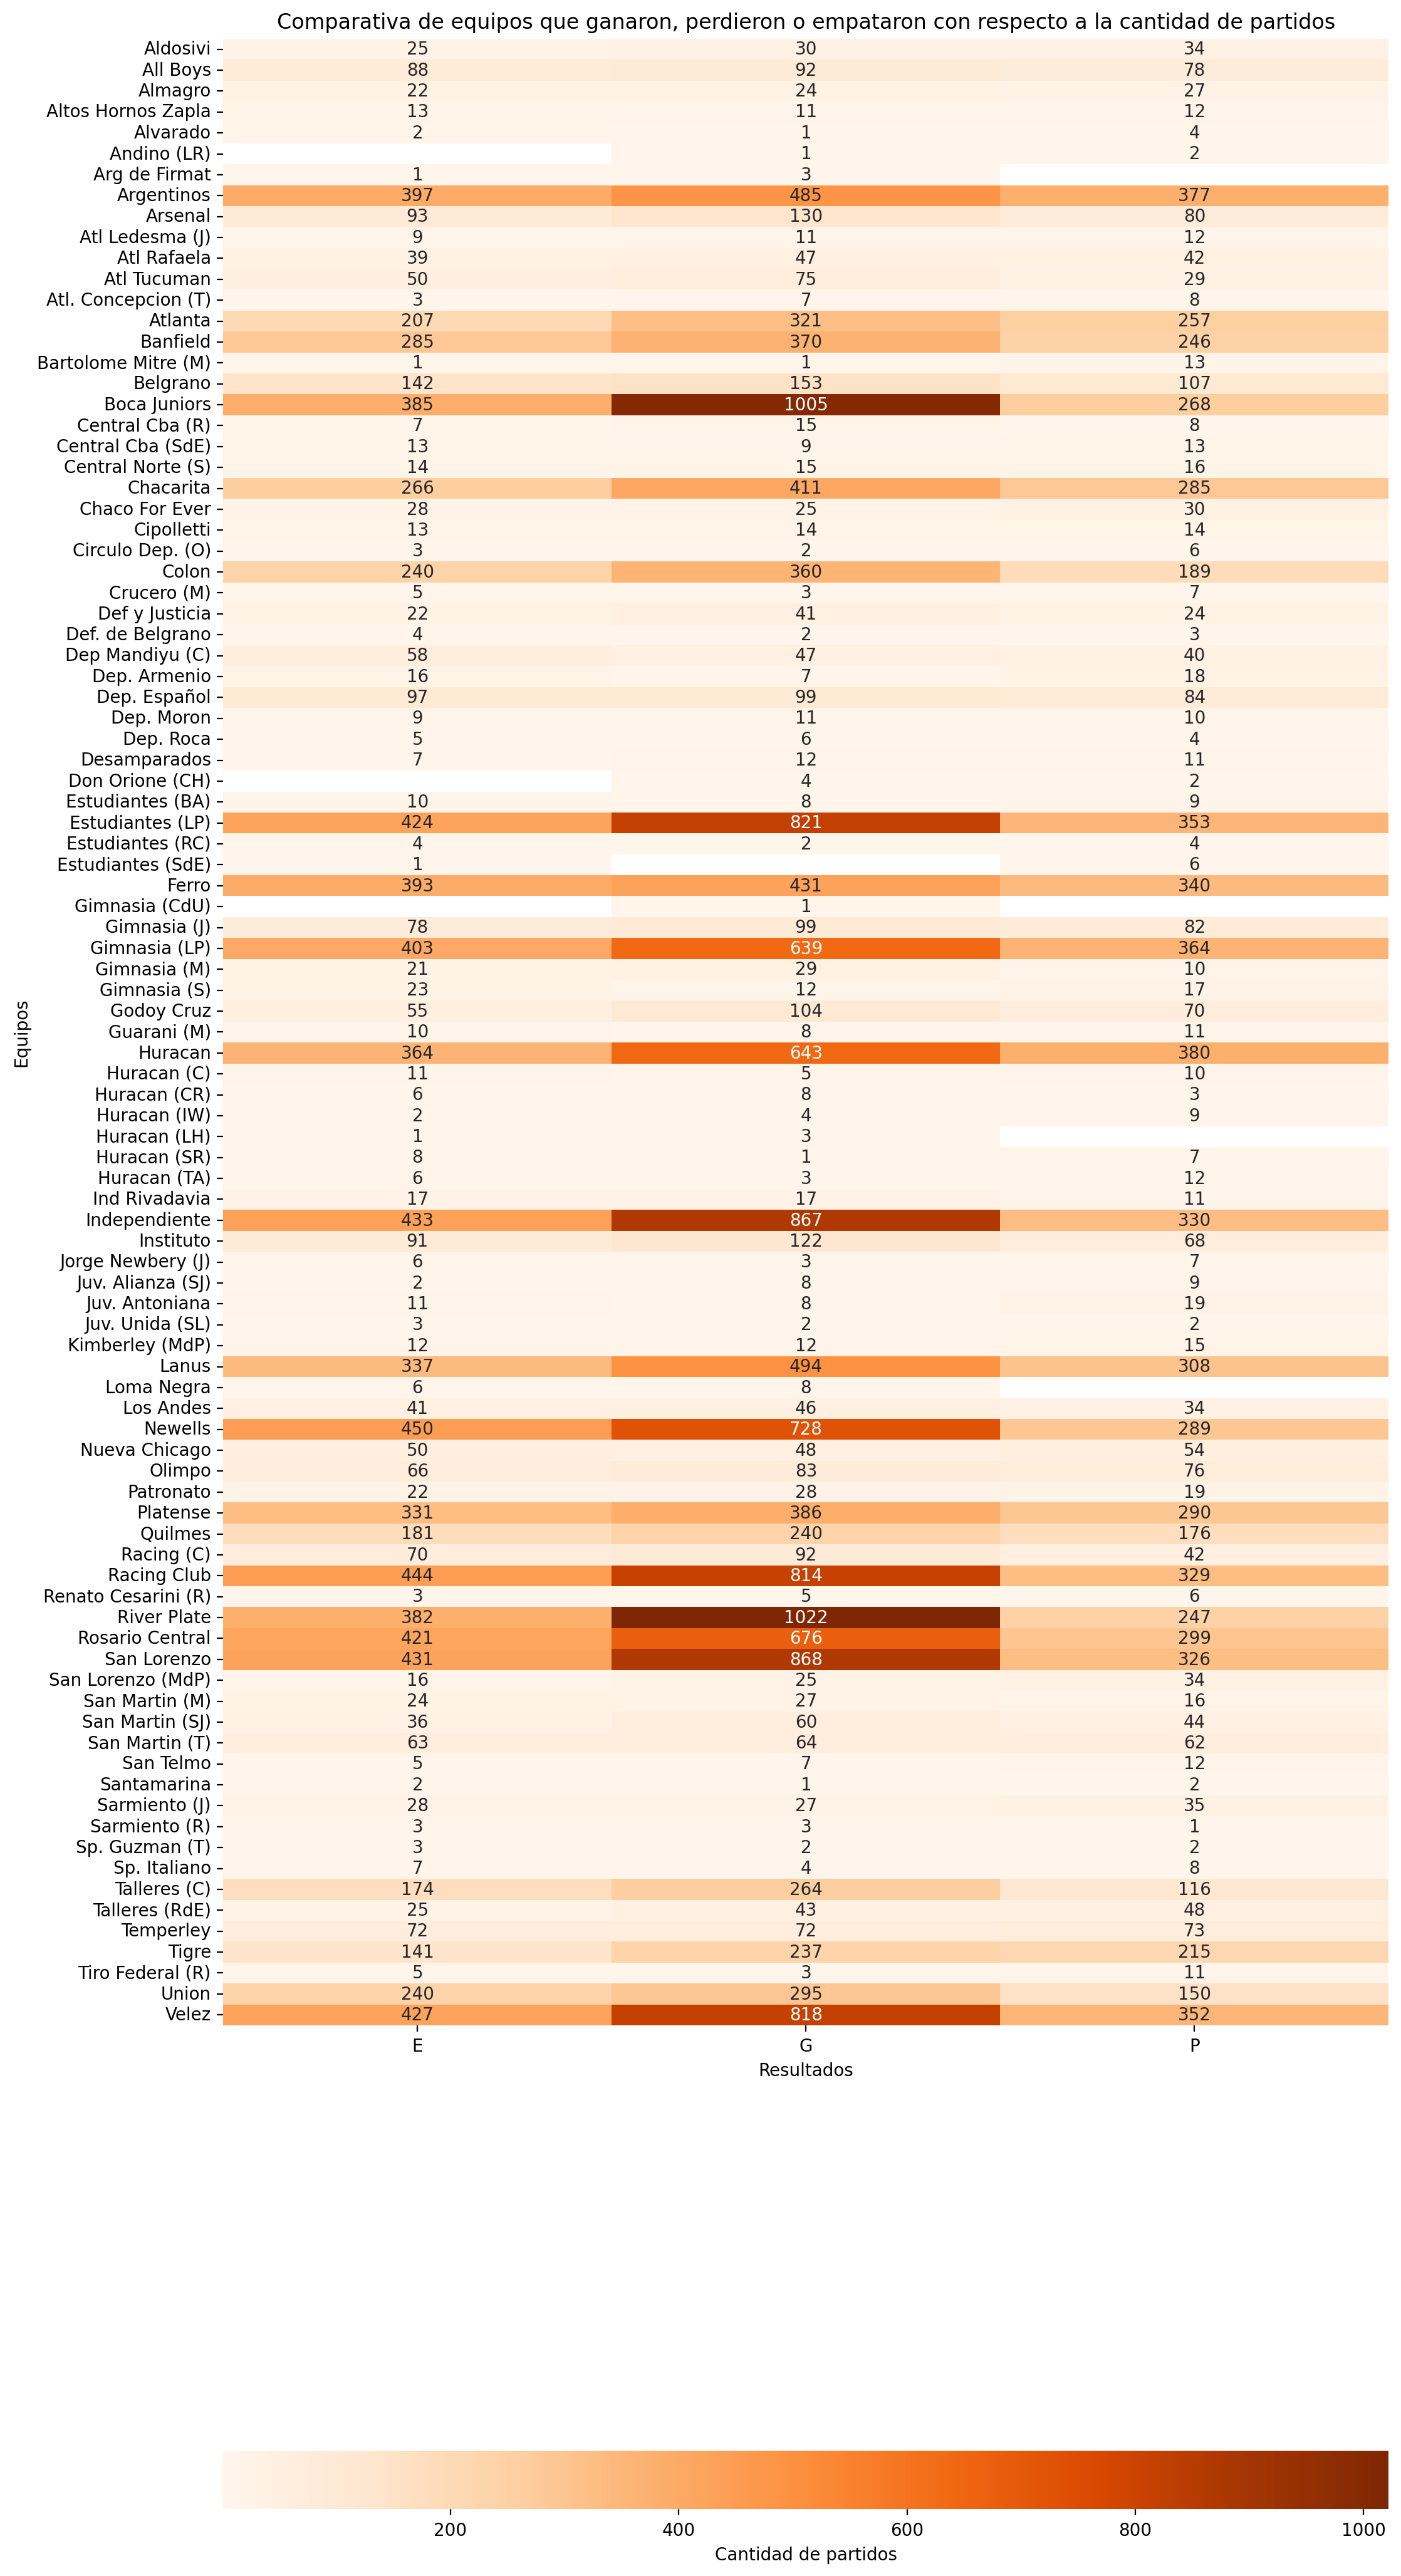

In [39]:
results_local_plot = results_local.copy()
results_local_plot.rename({'local_team': 'Equipos', \
                                 'result': 'Resultados'}, axis=1, inplace=True)

results_local_plot = pd.pivot_table(results_local_plot, values='count', columns='Resultados', index='Equipos')

fig, ax = plt.subplots(figsize=(12,30), dpi=200)       
sns.heatmap(results_local_plot, cmap='Oranges', ax=ax, annot=True, fmt='g',\
            cbar_kws={'label': 'Cantidad de partidos', "orientation": "horizontal"})
ax.set_title('Comparativa de equipos que ganaron, perdieron o empataron con respecto a la cantidad de partidos');

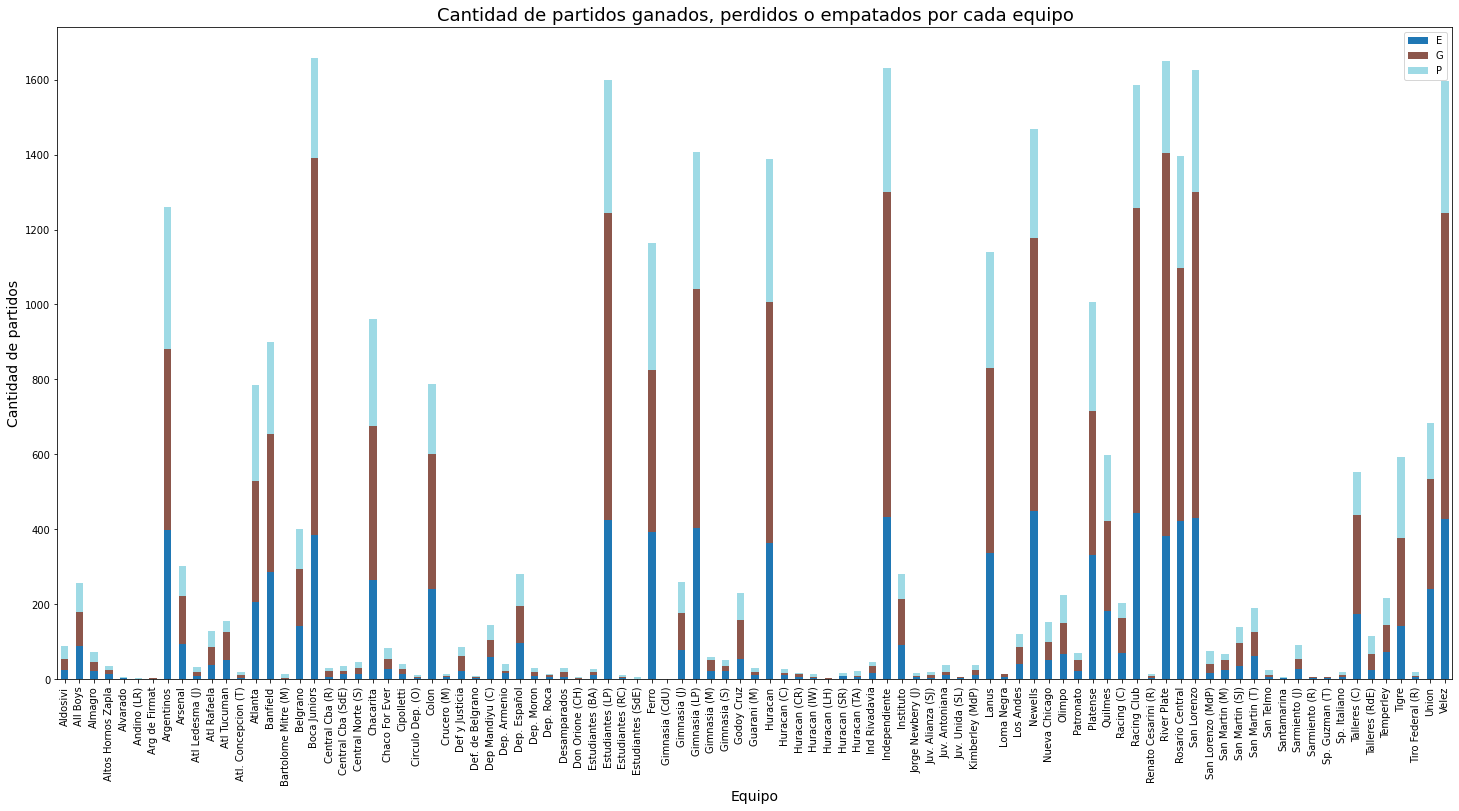

In [37]:
results_local_bar = results_local.copy()
results_local_bar = results_local_bar.groupby([ 'local_team','result']).mean().unstack()
results_local_bar = results_local_bar.plot(kind='bar',stacked=True, colormap='tab20', figsize=(25,12))
results_local_bar.set_title('Cantidad de partidos ganados, perdidos o empatados por cada equipo', size=18)
results_local_bar.set_ylabel('Cantidad de partidos', size=14)
results_local_bar.set_xlabel('Equipo', size=14)
results_local_bar.legend(['E', 'G', 'P'])
plt.show()

## Transacciones SUBE 2022

In [22]:
sube = pd.read_csv('data/dat-ab-usos-2022.csv')
sube

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO
...,...,...,...,...,...,...,...,...,...,...
317648,2022-09-24,A T A C O NORTE S A C I,RES_COL_POP_Y _VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,20,SI
317649,2022-09-24,A T A C O NORTE S A C I,RES_PUERTO_TIROL_Y VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,1520,SI
317650,2022-09-24,ETACER SRL,STAFE_SANTA FE_LINEA_907,NO,COLECTIVO,NACIONAL,JN,SD,1593,SI
317651,2022-09-24,TRANSPORTE CASTELLI S.R.L.,TD-02,NO,COLECTIVO,PROVINCIAL,NEUQUÉN,SN,527,SI


In [35]:
sube_count = sube.loc[:, ['DIA_TRANSPORTE', 'AMBA', 'CANTIDAD']]
sube_count['DIA_SEMANA'] = pd.to_datetime(sube_count['DIA_TRANSPORTE']).dt.dayofweek
sube_count['DIA_SEMANA_NOMBRE'] = sube_count['DIA_SEMANA']\
                            .apply(lambda x: 'Lunes' if (x == 0) else \
                                            ('Martes' if (x == 1) else \
                                            ('Miércoles' if(x == 2) else \
                                            ('Jueves' if (x == 3) else \
                                            ('Viernes' if (x == 4) else \
                                            ('Sábado' if (x == 5) else \
                                            ('Domingo' if (x == 6) else '')))))))
sube_count

,DIA_TRANSPORTE,AMBA,CANTIDAD,DIA_SEMANA,DIA_SEMANA_NOMBRE
0,2022-01-01,SI,10,5,Sábado
1,2022-01-01,SI,19,5,Sábado
2,2022-01-01,NO,1418,5,Sábado
3,2022-01-01,SI,675,5,Sábado
4,2022-01-01,NO,1906,5,Sábado
...,...,...,...,...,...
317648,2022-09-24,NO,20,5,Sábado
317649,2022-09-24,NO,1520,5,Sábado
317650,2022-09-24,NO,1593,5,Sábado
317651,2022-09-24,NO,527,5,Sábado


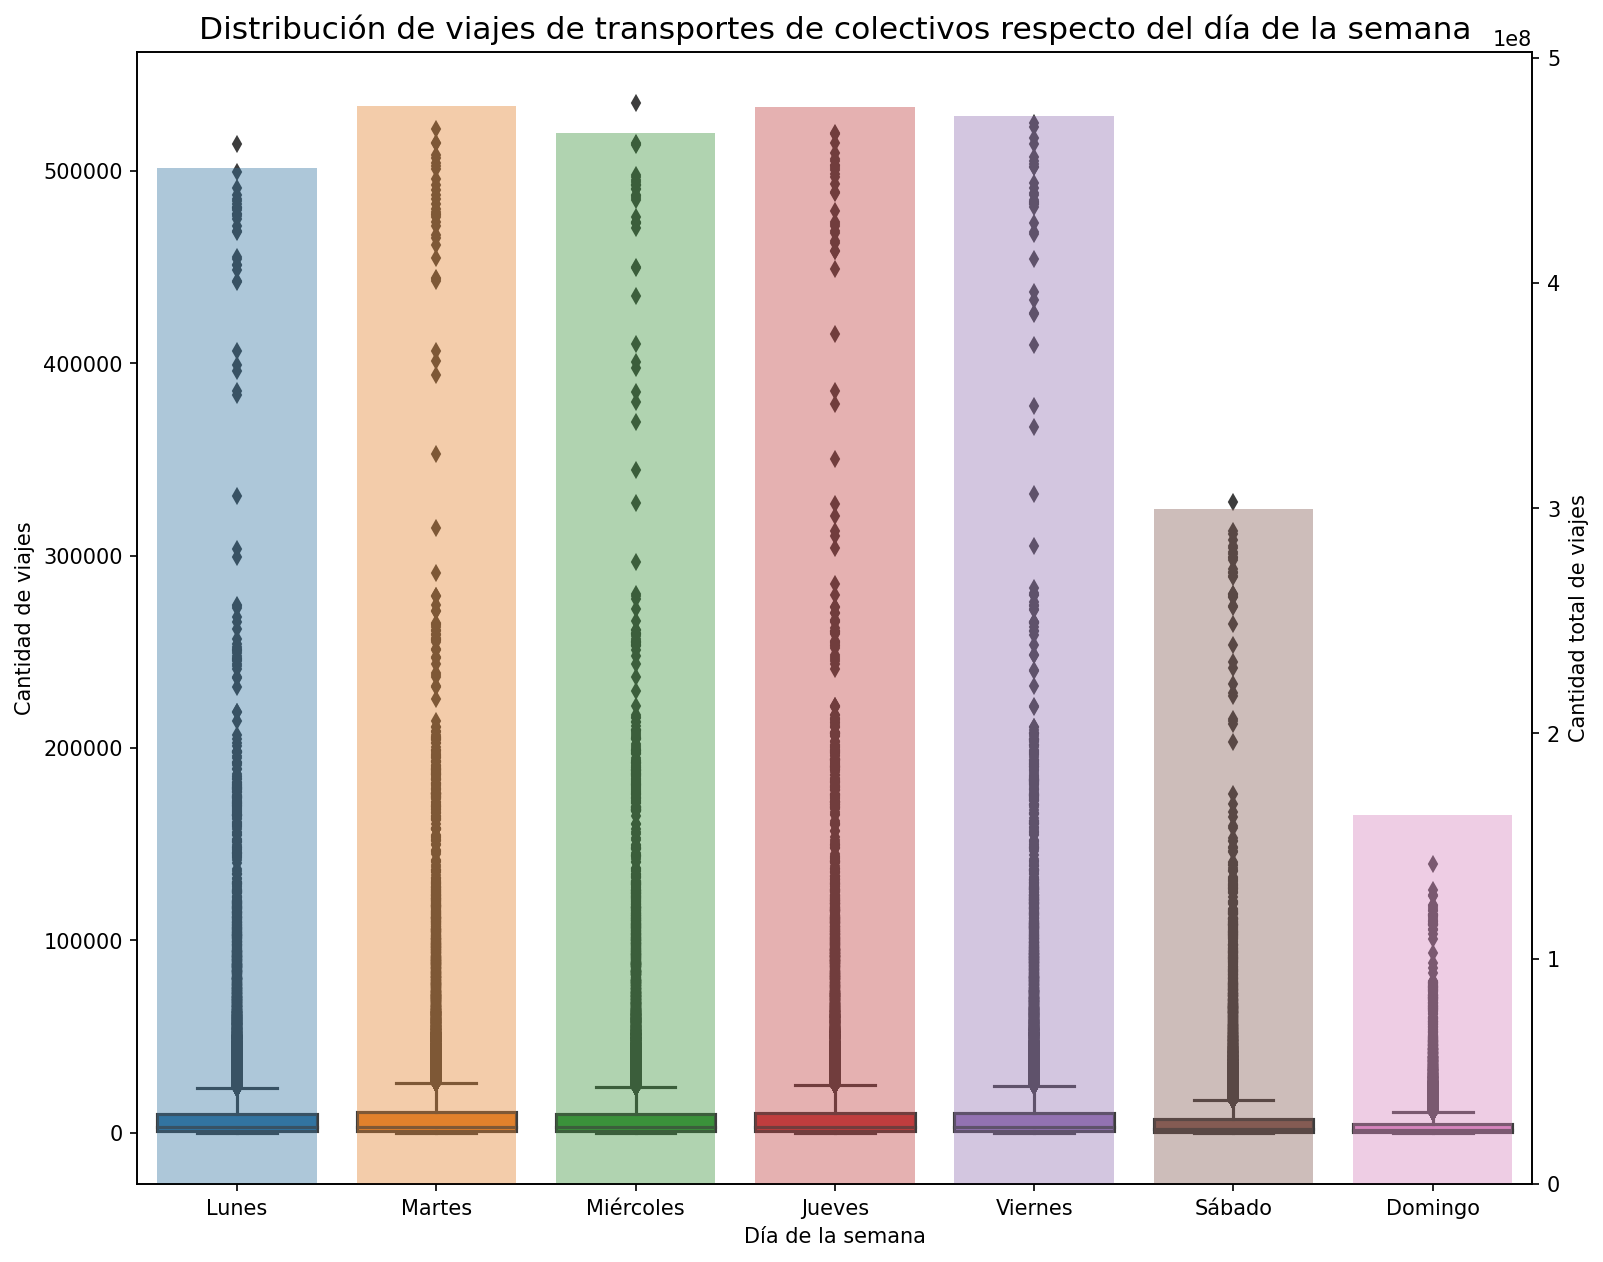

In [82]:
sube_count_boxplot = sube_count.loc[:, ['CANTIDAD','DIA_SEMANA', 'DIA_SEMANA_NOMBRE']]
sube_count_boxplot = sube_count_boxplot.sort_values(by='DIA_SEMANA', ascending=True)

sube_count_gb_boxplot = sube_count_boxplot.groupby('DIA_SEMANA_NOMBRE').agg({'CANTIDAD': 'sum', 'DIA_SEMANA': 'first'})\
                        .reset_index()
sube_count_gb_boxplot = sube_count_gb_boxplot.sort_values(by='DIA_SEMANA', ascending=True)

sube_count_boxplot = sube_count_boxplot.drop(columns={"DIA_SEMANA"})
sube_count_gb_boxplot = sube_count_gb_boxplot.drop(columns={"DIA_SEMANA"})
sube_count_gb_boxplot.rename({'CANTIDAD': 'Cantidad total de viajes'}, axis=1, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[12, 10], dpi=150, sharey=True)

plt.title("Distribución de viajes de transportes de colectivos respecto del día de la semana", size=15)

sns.boxplot(
    data=sube_count_boxplot
    ,
    y='CANTIDAD',
    x='DIA_SEMANA_NOMBRE',
    ax= axes
)
axes.set_ylabel("Cantidad de viajes")
axes.set_xlabel("Día de la semana")

axes_sube = axes.twinx()

sns.barplot(
    data=sube_count_gb_boxplot
    ,
    y='Cantidad total de viajes',
    x='DIA_SEMANA_NOMBRE',
    ax= axes_sube,
    alpha=0.4
)

plt.show()

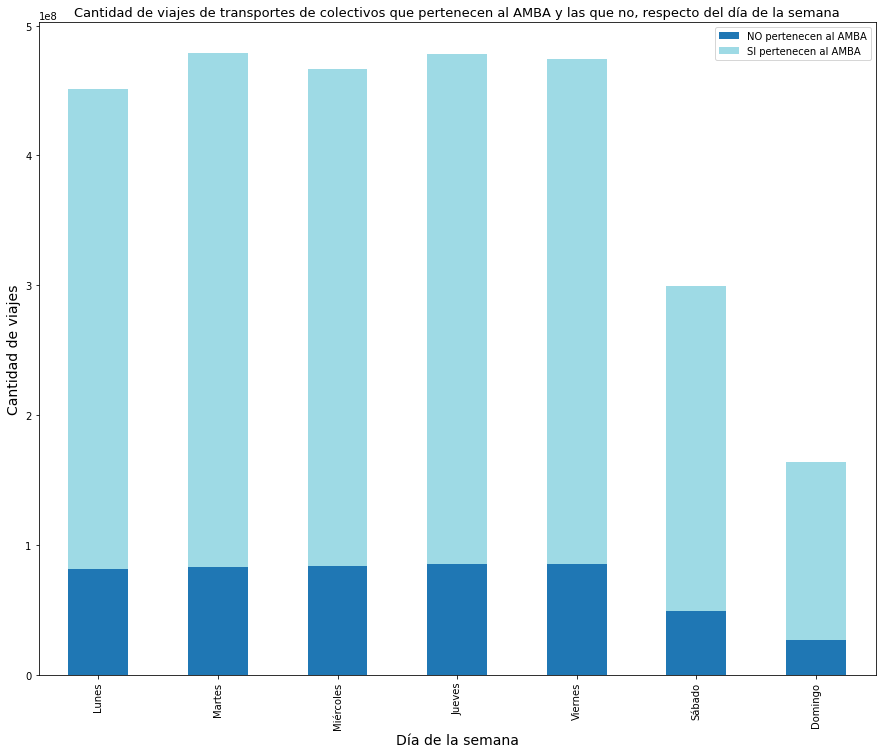

In [66]:
index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
sube_count_bar = sube_count.loc[:, ['DIA_SEMANA_NOMBRE', 'AMBA', 'CANTIDAD']]
sube_count_bar = sube_count_bar.groupby(['DIA_SEMANA_NOMBRE','AMBA']).sum().unstack()
sube_count_bar = sube_count_bar.reindex(index)
sube_count_bar = sube_count_bar.plot(kind='bar',stacked=True, colormap='tab20', figsize=(15,12))
sube_count_bar.set_title('Cantidad de viajes de transportes de colectivos que pertenecen al AMBA y las que no, respecto del día de la semana', size=13)
sube_count_bar.set_ylabel('Cantidad de viajes', size=14)
sube_count_bar.set_xlabel('Día de la semana', size=14)
sube_count_bar.legend(['NO pertenecen al AMBA','SI pertenecen al AMBA'])
plt.show()

## Google Play Store Apps

In [2]:
googleplaystore = pd.read_csv('data/googleplaystore.csv')
googleplaystore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
googleplaystore_rating = googleplaystore.loc[(pd.notna(googleplaystore.Rating) & pd.notna(googleplaystore.Type)\
                        & (googleplaystore.Type != '0')),\
                        ['Rating', 'Type']]
googleplaystore_rating

,Rating,Type
0,4.1,Free
1,3.9,Free
2,4.7,Free
3,4.5,Free
4,4.3,Free
...,...,...
10834,4.0,Free
10836,4.5,Free
10837,5.0,Free
10839,4.5,Free


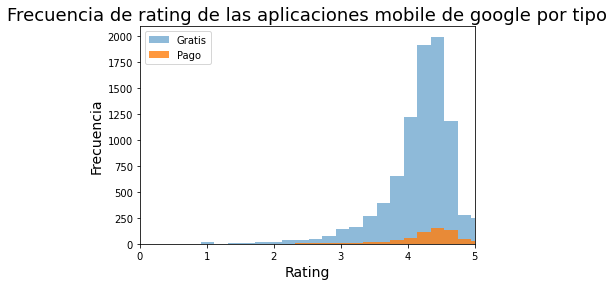

In [5]:
googleplaystore_free_hist = googleplaystore_rating.loc[(googleplaystore_rating.Type == 'Free'), ['Rating']]
googleplaystore_paid_hist = googleplaystore_rating.loc[(googleplaystore_rating.Type == 'Paid'), ['Rating']]

bins = np.linspace(-10, 10, 100)

plt.hist(googleplaystore_free_hist.Rating, bins, alpha=0.5, label='Gratis')
plt.hist(googleplaystore_paid_hist.Rating, bins, alpha=0.8, label='Pago')
plt.legend(loc='upper left')

plt.title('Frecuencia de rating de las aplicaciones mobile de google por tipo', size=18)
plt.ylabel('Frecuencia', size=14)
plt.xlabel('Rating', size=14)
plt.xlim(0.0, 5.0)

plt.show()

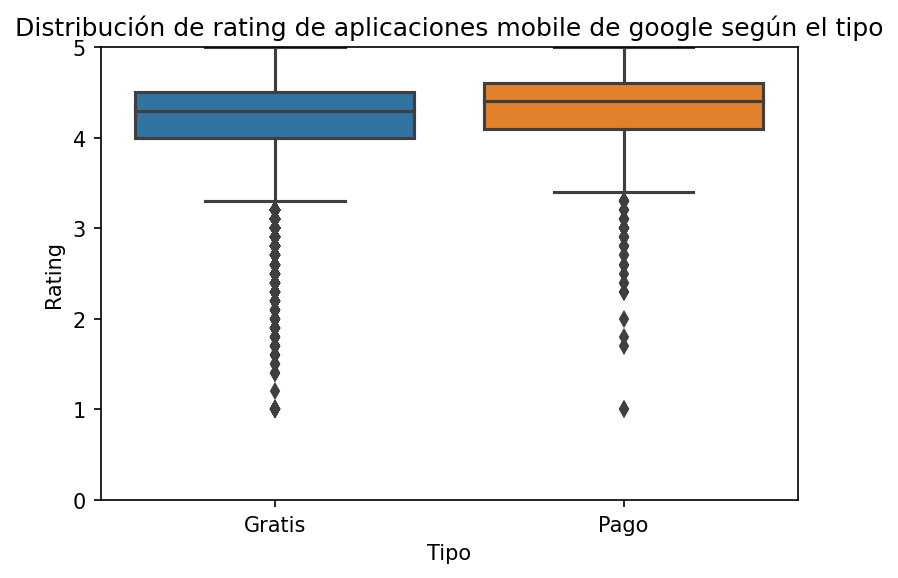

In [12]:
googleplaystore_boxplot = googleplaystore_rating.loc[:, ['Rating', 'Type']]
googleplaystore_boxplot['Type'] = googleplaystore_boxplot['Type'].apply(lambda x: 'Gratis' if x == 'Free' else 'Pago')

plt.figure(figsize=[6, 4], dpi=150)
plt.title("Distribución de rating de aplicaciones mobile de google según el tipo")
ax = sns.boxplot(
    data=googleplaystore_boxplot
    ,
    y='Rating',
    x='Type',
)
plt.ylabel("Rating")
plt.xlabel("Tipo")
ax.set_ylim(0, 5)
plt.show()

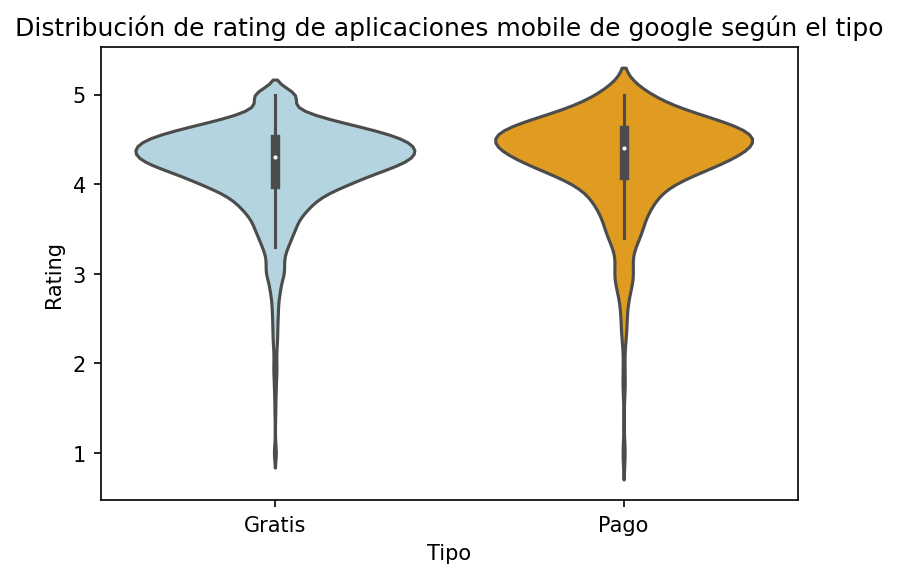

In [19]:
googleplaystore_violinplot = googleplaystore_rating.loc[:, ['Rating', 'Type']]
googleplaystore_violinplot['Type'] = googleplaystore_violinplot['Type'].apply(lambda x: 'Gratis' if x == 'Free' else 'Pago')

plt.figure(figsize=[6, 4], dpi=150)
plt.title("Distribución de rating de aplicaciones mobile de google según el tipo")
ax = sns.violinplot(
    data=googleplaystore_violinplot
    ,
    y='Rating',
    x='Type',
    palette=["lightBlue", "orange"],
)
plt.ylabel("Rating")
plt.xlabel("Tipo")
plt.show()

# Visu Original

## Clásicos del fútbol Argentino

Dataset: https://www.kaggle.com/datasets/aimontero/clasicos-arg

Para la visualización usé NgxCharts: https://swimlane.github.io/ngx-charts/#/ngx-charts/bar-vertical-stacked

In [49]:
clasicos = pd.read_csv('data/clasicos.csv')
clasicos

,local_goals,local_name,match,visitor_goals,visitor_name
0,0,Colon,Superliga 2018/19 - Fecha 4,0,Union
1,1,Union,Superliga 2017/18 - Fecha 17,1,Colon
2,1,Colon,Campeonato 2016/17 - Fecha 24,1,Union
3,0,Union,Campeonato 2016/17 - Fecha 16,2,Colon
4,1,Union,Torneo 2016 - Fecha 12,0,Colon
...,...,...,...,...,...
931,1,Boca Juniors,Campeonato 1933 - Fecha 17,1,River Plate
932,2,Boca Juniors,Campeonato 1932 - Fecha 32,1,River Plate
933,1,River Plate,Campeonato 1932 - Fecha 15,1,Boca Juniors
934,0,River Plate,Campeonato 1931 - Fecha 34,3,Boca Juniors


In [50]:
clasicos['match_team'] = clasicos['local_name'] + ' Vs ' + clasicos['visitor_name']
clasicos

,local_goals,local_name,match,visitor_goals,visitor_name,match_team
0,0,Colon,Superliga 2018/19 - Fecha 4,0,Union,Colon Vs Union
1,1,Union,Superliga 2017/18 - Fecha 17,1,Colon,Union Vs Colon
2,1,Colon,Campeonato 2016/17 - Fecha 24,1,Union,Colon Vs Union
3,0,Union,Campeonato 2016/17 - Fecha 16,2,Colon,Union Vs Colon
4,1,Union,Torneo 2016 - Fecha 12,0,Colon,Union Vs Colon
...,...,...,...,...,...,...
931,1,Boca Juniors,Campeonato 1933 - Fecha 17,1,River Plate,Boca Juniors Vs River Plate
932,2,Boca Juniors,Campeonato 1932 - Fecha 32,1,River Plate,Boca Juniors Vs River Plate
933,1,River Plate,Campeonato 1932 - Fecha 15,1,Boca Juniors,River Plate Vs Boca Juniors
934,0,River Plate,Campeonato 1931 - Fecha 34,3,Boca Juniors,River Plate Vs Boca Juniors


In [51]:
clasicos_local_win = clasicos.loc[clasicos['local_goals'] > clasicos['visitor_goals'], :]
clasicos_local_win['match_result'] = 'Ganó Local'
clasicos_local_win

/tmp/ipykernel_16834/786129192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasicos_local_win['match_result'] = 'Ganó Local'


,local_goals,local_name,match,visitor_goals,visitor_name,match_team,match_result
4,1,Union,Torneo 2016 - Fecha 12,0,Colon,Union Vs Colon,Ganó Local
8,1,Union,Torneo Final 2013 - Fecha 16,0,Colon,Union Vs Colon,Ganó Local
9,2,Colon,Torneo Inicial 2012 - Fecha 16,0,Union,Colon Vs Union,Ganó Local
13,1,Colon,Torneo Apertura 2002 - Fecha 10,0,Union,Colon Vs Union,Ganó Local
18,4,Colon,Torneo Clausura 2000 - Fecha 5,0,Union,Colon Vs Union,Ganó Local
...,...,...,...,...,...,...,...
926,1,Boca Juniors,Campeonato 1935 - Fecha 5,0,River Plate,Boca Juniors Vs River Plate,Ganó Local
927,2,Boca Juniors,Campeonato 1934 - Fecha 32,0,River Plate,Boca Juniors Vs River Plate,Ganó Local
929,4,Boca Juniors,Campeonato 1934 - Fecha 12,1,River Plate,Boca Juniors Vs River Plate,Ganó Local
930,3,River Plate,Campeonato 1933 - Fecha 34,1,Boca Juniors,River Plate Vs Boca Juniors,Ganó Local


In [52]:
clasicos_visitor_win = clasicos.loc[clasicos['local_goals'] < clasicos['visitor_goals'], :]
clasicos_visitor_win['match_result'] = 'Ganó Visitante'
clasicos_visitor_win

/tmp/ipykernel_16834/384201657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasicos_visitor_win['match_result'] = 'Ganó Visitante'


,local_goals,local_name,match,visitor_goals,visitor_name,match_team,match_result
3,0,Union,Campeonato 2016/17 - Fecha 16,2,Colon,Union Vs Colon,Ganó Visitante
5,0,Colon,Torneo 2016 - Fecha 8,3,Union,Colon Vs Union,Ganó Visitante
11,0,Colon,Torneo Apertura 2011 - Fecha 4,2,Union,Colon Vs Union,Ganó Visitante
21,0,Union,Torneo Apertura 1998 - Fecha 7,2,Colon,Union Vs Colon,Ganó Visitante
29,0,Colon,Metropolitano 1980 - Fecha 17,1,Union,Colon Vs Union,Ganó Visitante
...,...,...,...,...,...,...,...
917,0,River Plate,Campeonato 1939 - Fecha 13,2,Boca Juniors,River Plate Vs Boca Juniors,Ganó Visitante
919,1,Boca Juniors,Campeonato 1938 - Fecha 2,2,River Plate,Boca Juniors Vs River Plate,Ganó Visitante
924,2,Boca Juniors,Copa de Honor 1936 - Fecha 3,3,River Plate,Boca Juniors Vs River Plate,Ganó Visitante
928,0,River Plate,Campeonato 1934 - Fecha 25,1,Boca Juniors,River Plate Vs Boca Juniors,Ganó Visitante


In [53]:
clasicos_tied_match = clasicos.loc[clasicos['local_goals'] == clasicos['visitor_goals'], :]
clasicos_tied_match['match_result'] = 'Empataron'
clasicos_tied_match

/tmp/ipykernel_16834/2835997135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasicos_tied_match['match_result'] = 'Empataron'


,local_goals,local_name,match,visitor_goals,visitor_name,match_team,match_result
0,0,Colon,Superliga 2018/19 - Fecha 4,0,Union,Colon Vs Union,Empataron
1,1,Union,Superliga 2017/18 - Fecha 17,1,Colon,Union Vs Colon,Empataron
2,1,Colon,Campeonato 2016/17 - Fecha 24,1,Union,Colon Vs Union,Empataron
6,0,Union,Campeonato 2015 - Fecha 27,0,Colon,Union Vs Colon,Empataron
7,0,Colon,Campeonato 2015 - Fecha 24,0,Union,Colon Vs Union,Empataron
...,...,...,...,...,...,...,...
918,2,River Plate,Campeonato 1938 - Fecha 19,2,Boca Juniors,River Plate Vs Boca Juniors,Empataron
925,1,River Plate,Campeonato 1935 - Fecha 22,1,Boca Juniors,River Plate Vs Boca Juniors,Empataron
931,1,Boca Juniors,Campeonato 1933 - Fecha 17,1,River Plate,Boca Juniors Vs River Plate,Empataron
933,1,River Plate,Campeonato 1932 - Fecha 15,1,Boca Juniors,River Plate Vs Boca Juniors,Empataron


In [54]:
clasicos_result = pd.concat([clasicos_local_win, clasicos_visitor_win, clasicos_tied_match], ignore_index=True)
clasicos_result

,local_goals,local_name,match,visitor_goals,visitor_name,match_team,match_result
0,1,Union,Torneo 2016 - Fecha 12,0,Colon,Union Vs Colon,Ganó Local
1,1,Union,Torneo Final 2013 - Fecha 16,0,Colon,Union Vs Colon,Ganó Local
2,2,Colon,Torneo Inicial 2012 - Fecha 16,0,Union,Colon Vs Union,Ganó Local
3,1,Colon,Torneo Apertura 2002 - Fecha 10,0,Union,Colon Vs Union,Ganó Local
4,4,Colon,Torneo Clausura 2000 - Fecha 5,0,Union,Colon Vs Union,Ganó Local
...,...,...,...,...,...,...,...
931,2,River Plate,Campeonato 1938 - Fecha 19,2,Boca Juniors,River Plate Vs Boca Juniors,Empataron
932,1,River Plate,Campeonato 1935 - Fecha 22,1,Boca Juniors,River Plate Vs Boca Juniors,Empataron
933,1,Boca Juniors,Campeonato 1933 - Fecha 17,1,River Plate,Boca Juniors Vs River Plate,Empataron
934,1,River Plate,Campeonato 1932 - Fecha 15,1,Boca Juniors,River Plate Vs Boca Juniors,Empataron


In [55]:
clasicos_result.to_csv('data/clasicos_result.csv', encoding='utf-8')

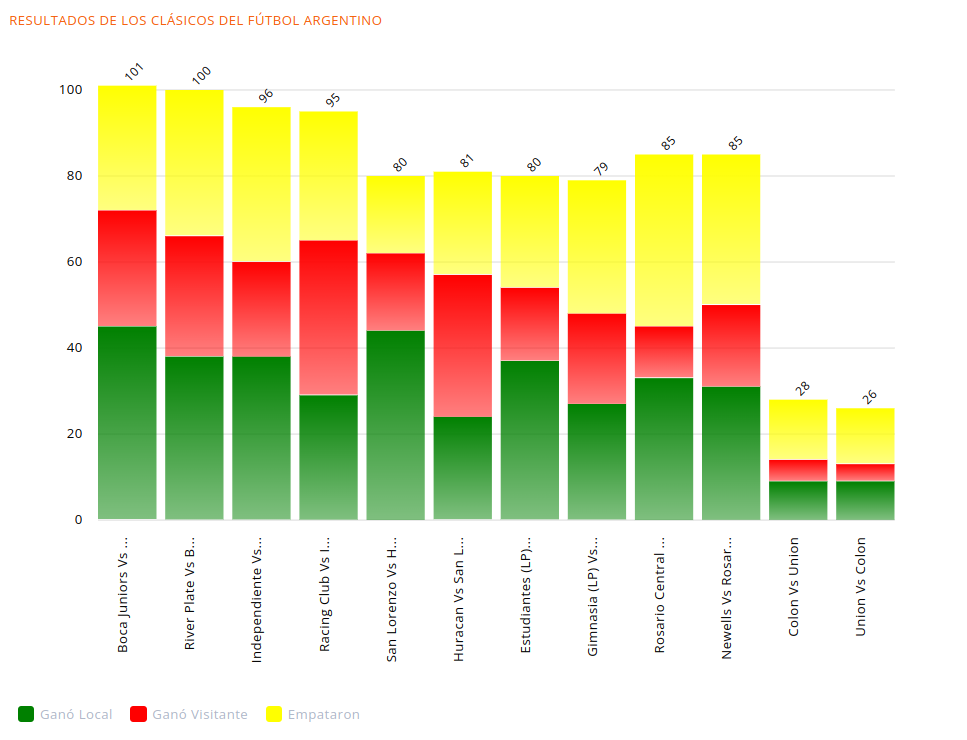

In [56]:
Image("clasicos_result.png")